In [1]:
#importing libraries

import pandas as pd

movies= pd.read_csv("../data/movie.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [2]:
ratings = pd.read_csv('../data/rating.csv')
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [7]:
print('Movies: ', movies.shape)
print('Ratings: ', ratings.shape)
print("Unique users:", ratings['userId'].nunique())
print("Unique movies rated:", ratings['movieId'].nunique())

Movies:  (27278, 3)
Ratings:  (20000263, 4)
Unique users: 138493
Unique movies rated: 26744


Total Movies: 26744
Total Users: 138493
Total Ratings: 

In [8]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

There are no missing values found in both of these attributes

In [10]:
rating_counts = ratings['rating'].value_counts().sort_index()

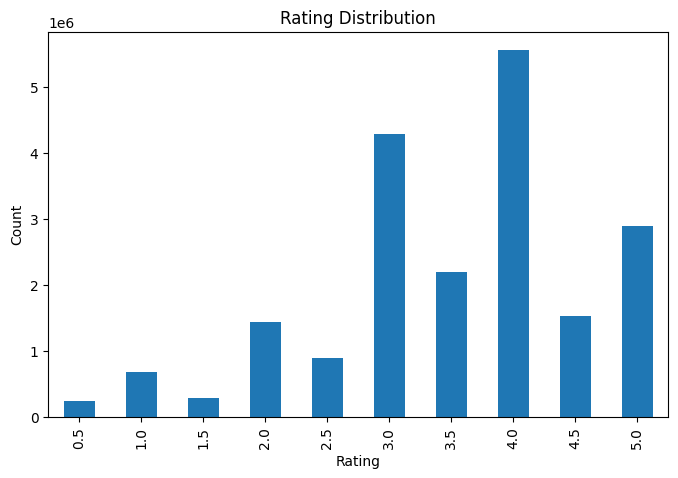

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
rating_counts.plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.show()


The rating distribution shows a strong bias toward higher ratings (3.5–4.5), indicating positivity bias. This suggests that ranking-based metrics such as Precision@K are more informative than accuracy-based metrics.

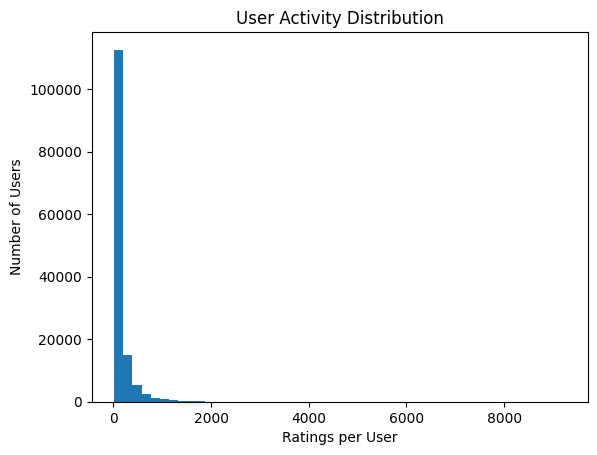

In [12]:
user_activity = ratings.groupby('userId').size()

plt.hist(user_activity, bins=50)
plt.xlabel("Ratings per User")
plt.ylabel("Number of Users")
plt.title("User Activity Distribution")
plt.show()

The user activity distribution exhibits a long-tail pattern, where the majority of users have rated only a small number of movies, while a small subset of users are highly active. This imbalance poses challenges for personalization and cold-start scenarios in recommender systems.

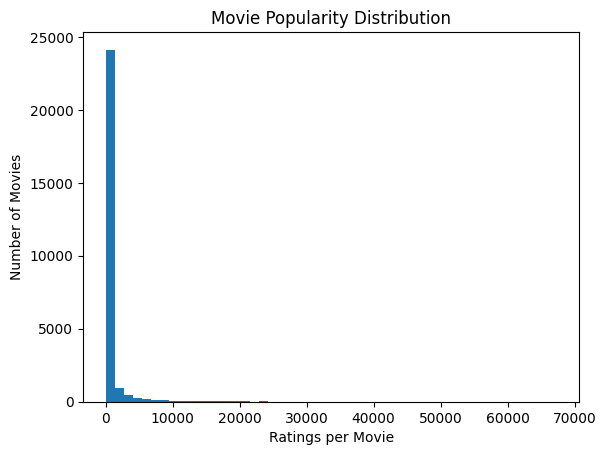

In [13]:
movie_popularity = ratings.groupby('movieId').size()

plt.hist(movie_popularity, bins=50)
plt.xlabel("Ratings per Movie")
plt.ylabel("Number of Movies")
plt.title("Movie Popularity Distribution")
plt.show()


The movie popularity distribution follows a long-tail pattern, where most movies receive very few ratings, and a small number of popular movies receive a disproportionately large number of ratings.

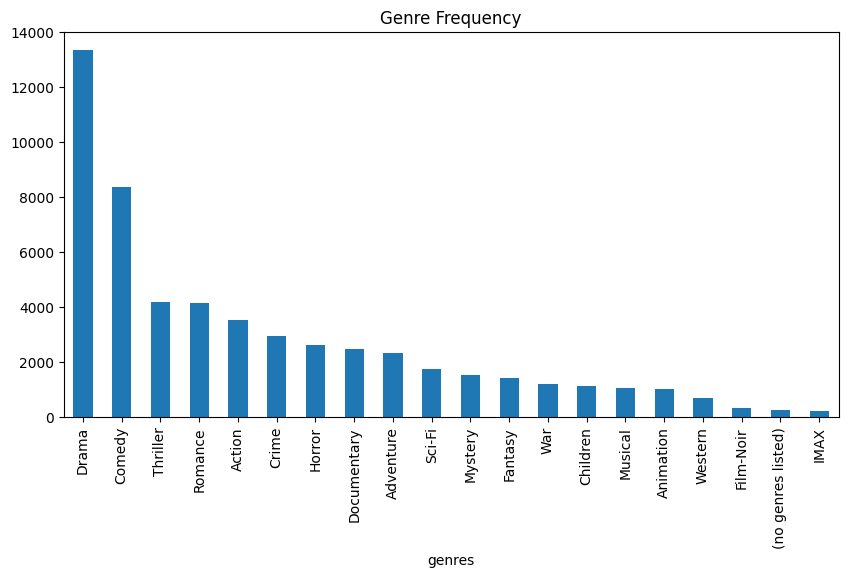

In [14]:
movies['genres'] = movies['genres'].str.split('|')

genre_counts = movies['genres'].explode().value_counts()

genre_counts.plot(kind='bar', figsize=(10,5))
plt.title("Genre Frequency")
plt.show()


The results show that certain genres such as Drama and Comedy are significantly more prevalent in the dataset, while others like Film-Noir and IMAX appear less frequently.